
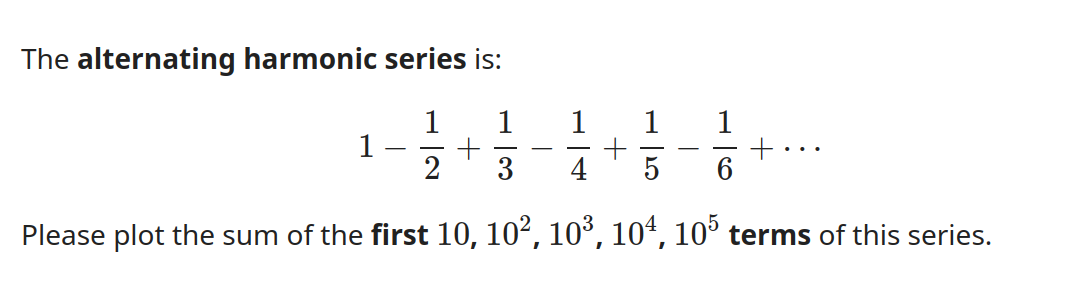


[0.6456349206349207, 0.688172179310195, 0.6926474305598223, 0.6930971830599583, 0.6931421805849816]


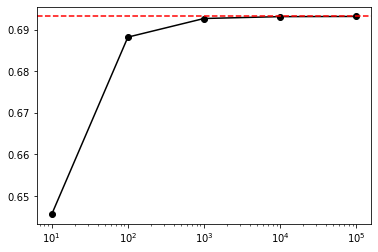

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def Compute_Sum(N):
    total = 0.0
    for n in range(1, N+1):
        total += (-1)**(n+1) / n
    return total

sum_list = []

N_list = [10,100,1000,10000,100000]
log_N_list = [1, 2,3,4,5]

for N in N_list:
    #print (N)
    sum_of_N_terms = Compute_Sum(N)
    sum_list.append(sum_of_N_terms)
    
print (sum_list)  
plt.plot(N_list, sum_list,'ko-')
plt.xscale('log')


ref_val = np.log(2)
plt.axhline(ref_val,color='red', linestyle='--')
#plt.plot(log_N_list, sum_list,'ko-')

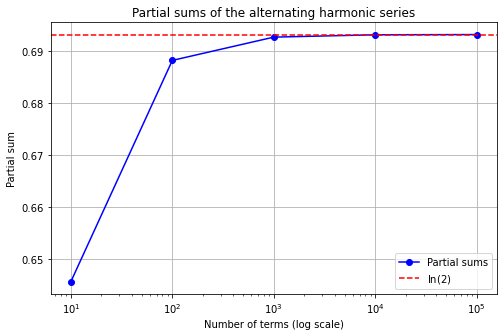

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def Compute_Sum(N):
    total = 0.0
    for n in range(1, N+1):
        total += (-1)**(n+1) / n
    return total

    
# Number of terms
terms = [10, 10**2, 10**3, 10**4, 10**5]
    
# Compute partial sums
partial_sums = []
for N in terms:
    #n = np.arange(1, N+1)
    #sum_N = np.sum((-1)**(n+1) / n)
    sum_N = Compute_Sum(N)
    partial_sums.append(sum_N)

# Plot
plt.figure(figsize=(8,5))
plt.plot(terms, partial_sums, 'o-', color='blue', label='Partial sums')
plt.axhline(np.log(2), color='red', linestyle='--', label=r'$\ln(2)$')
plt.xscale('log')
plt.xlabel('Number of terms (log scale)')
plt.ylabel('Partial sum')
plt.title('Partial sums of the alternating harmonic series')
plt.grid(True)
plt.legend()
plt.show()

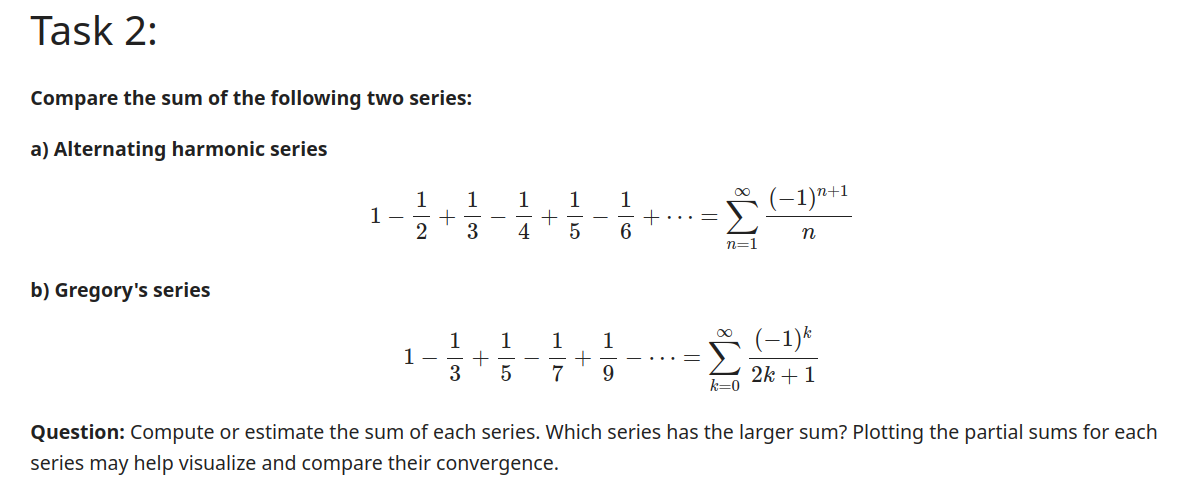

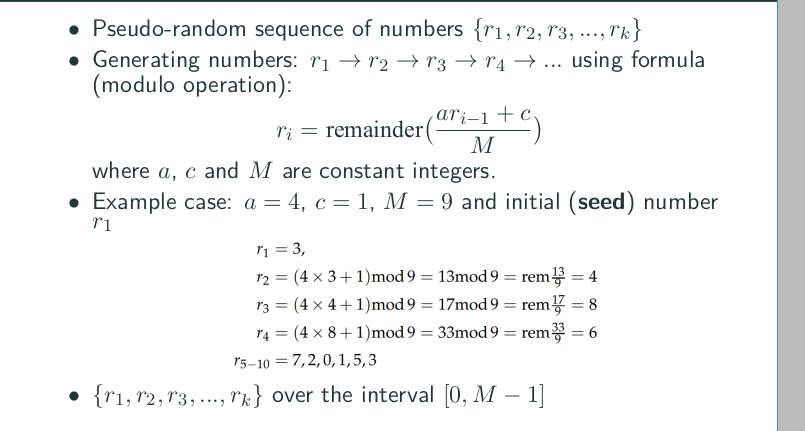

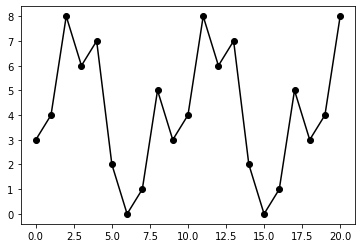

In [30]:
a = 4
c = 1
M = 9
#r1 = 3

def LCG(a,c,M,r):
    ans = (a * r + c )%M
    return ans


r = 3
r_list = [3]
iter_list = [0]
for i in range(20):
    r = LCG(a,c,M,r)
    r_list.append(r)  
    iter_list.append(i+1)
    
#print (r_list)    
#print (iter_list)

plt.plot(iter_list,r_list,'ko-')